
# No-Show Appointments- [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Our Dependent Variable for this Dataset is No-Show (says True if Patient doesnot show up else False If Patient Shows up).
Our Independent Variables are SMS-Received,Neighbourhood,Gender,Ailments (like Hypertension,Diabetes,Alcoholism) and Scholarship.He we are going to analyze how our dependent variable changes based on our dependent variable.

### Question(s) for Analysis
I would like to analyze the factors associated with presence or absence of the patient based on different factors.

1.Since Gender is a cateogeorical want to see the proportion of male and female showing up at the doctor.
 
2.Group by Appointment Day (Day of the week) and check  (DOW Vs No-Show)
  I will be analyzing the Day Of the week which is busier with patients.
  
3.Want to if age and ailements are related? Age vs ailments.
 How many with ailements(Hiper,Diab,Alch) showed up as  opposed to with no ailments showed up
 
4.Check if scholarships and neighborhood has any relation with patients showing up or no.


In [3]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [5]:
df=pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv",parse_dates=['ScheduledDay','AppointmentDay'])
#noshowappointments-kagglev2-may-2016.csv
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


There are no Nulls in the data set. However i would like to change data types of 2 variables here

In [6]:
# Changing the data types .
df['PatientId']=df['PatientId'].astype('str')
df['AppointmentID']=df['AppointmentID'].astype('str')

In [7]:
# Creating a new column called DOW to analyze the flow of patients based on day of the week.
df['DOW']=df['ScheduledDay'].dt.dayofweek
df.rename(columns={'No-show':'show'},inplace=True)     

In [8]:
df['show']=df['show'].map({'Yes':False ,'No':True})
df['show'].replace({True: 1, False: 0},inplace=True)

In [9]:
 df['show'].value_counts()

1    88208
0    22319
Name: show, dtype: int64

In [10]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [11]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,DOW
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,1.851955
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,1.378520
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,5.000000



### Data Cleaning


Looking at the histogram we can say 75 % of the records fall below 55 years old. Also we can spot the outlier in the box plot. Since mean and median are same,its safe to say that the average age of the patient is 37 years.


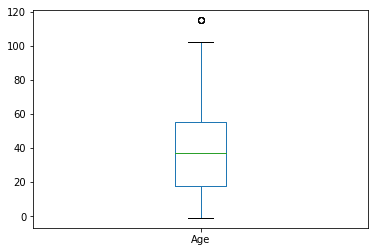

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['Age'].mean() 
df['Age'].plot(kind='box') 


Text(0,0.5,'Number of people in the respective age categeory')

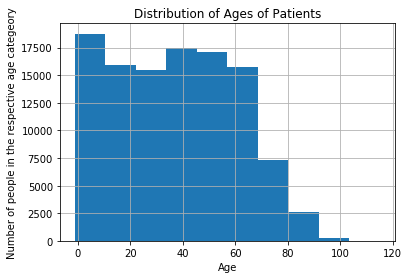

In [13]:
df['Age'].hist()
plt.title('Distribution of Ages of Patients')
plt.xlabel('Age')
plt.ylabel('Number of people in the respective age categeory')


Drop Duplicates and outliers

There is 1 record which is an outlier hence removing it.

There are duplicate records with same patient scheduled appointment on same day. We need to remove the duplicates first.

The same patient scheduling multiple times will receive diff Appointment Id hence no duplicates are showing in df.Hence removing duplicates based on subset of columns.
The below statement confirms it.

In [14]:
df.drop(df[df['Age']>100].index, inplace = True)

df.drop_duplicates(subset=['PatientId','ScheduledDay','Neighbourhood','Scholarship','Gender','Age'], keep='last',inplace=True)
 
# It Confirms that no duplicates included in our dataset now
df[['PatientId','ScheduledDay','Neighbourhood','Scholarship','Gender','Age','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']].duplicated().any()

False

<a id='eda'></a>
## Exploratory Data Analysis



I would like to analyze the factors associated with presence or absence of the patient based on different factors.

1.Since Gender is a cateogeorical want to see the proportion of male and female showing up at the doctor.
 

2.Group by Appointment Day (Day of the week) and check  (DOW Vs No-Show)

3.Want to see Age vs ailments.
 How many with ailements(Hiper,Diab,Alch) showed up as  opposed to with no ailments showed up
 
4.Check if scholarships and neighborhood has any relation with patients showing up or no.

### What percentage of Patients Showed up to the doctors office?

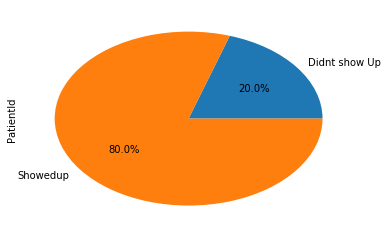

In [15]:

df.groupby('show')['PatientId'].count().plot(kind='pie',labels=['Didnt show Up','Showedup'],autopct='%1.1f%%')


## How many patients showed up and didnt show up in both Male and Female?

In [16]:
df2=df.groupby(['show','Gender'])['PatientId'].count()
df2

show  Gender
0     F         14308
      M          7556
1     F         56656
      M         30667
Name: PatientId, dtype: int64

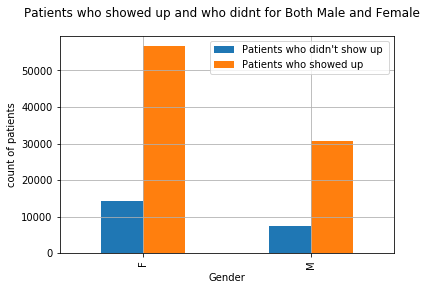

In [17]:
df2.unstack(level='show').plot(kind='bar',grid=True)
#unstack() places row in colum and stack() places column in rows
plt.legend(["Patients who didn't show up ",'Patients who showed up ']) 
plt.suptitle('Patients who showed up and who didnt for Both Male and Female') 
plt.ylabel('count of patients');

80% of Patients Showed up out of which most are Female.

### Do People Show up more on any particular Day of the week? 

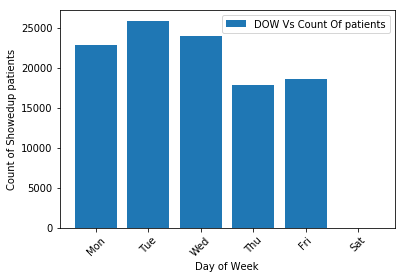

In [19]:
DOW=df.groupby('DOW')['show'].count()

fig, ax = plt.subplots()
ax.bar(DOW.index, DOW.values,label='DOW Vs Count Of patients')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Count of Showedup patients')

x1 = [0,1,2,3,4,5]
lab = ['Mon','Tue','Wed','Thu','Fri','Sat']
ax.set_xticks(x1)
ax.set_xticklabels(lab, minor=False, rotation=45)

ax.legend(loc='upper right');

Looks like Weekdays are most busier than Weekend out of which Tuesday seems to be most busiest week of the day compared to others.

## Do Patients with ailments showup more than Patients with no ailments?

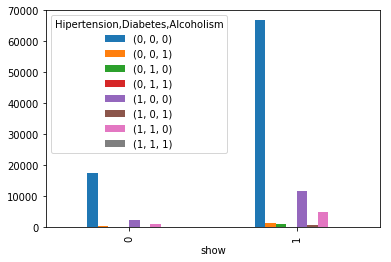

In [20]:
df3=df.groupby(['Hipertension','Diabetes', 'Alcoholism','show'])['PatientId'].count()
df3.unstack(level=['Hipertension','Diabetes', 'Alcoholism']).plot(kind='bar')
#df3.unstack(level=['Hipertension','Diabetes', 'Alcoholism'])

Looks like People with no ailments showed up more than patients with ailments

## Do People with scholarships showed up or not?

In [21]:
df4=df.groupby(['Scholarship','show'])['PatientId'].count()
df4

Scholarship  show
0            0       19334
             1       79127
1            0        2530
             1        8196
Name: PatientId, dtype: int64

Text(0,0.5,'count of patients')

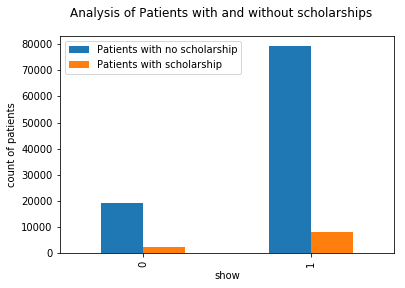

In [22]:
df4.unstack(level='Scholarship').plot(kind='bar')
plt.legend(["Patients with no scholarship",'Patients with scholarship']) 
plt.suptitle('Analysis of Patients with and without scholarships') 
plt.ylabel('count of patients')

Among the patients who visited Doctor, majority donot have any scholarships. Also, majority of patients who had scholarships didnt show up. Hence, Scholarships dont really seem to have an impact on number of patients showing up to doctor.

## Do People who received SMS tend to show up than others?

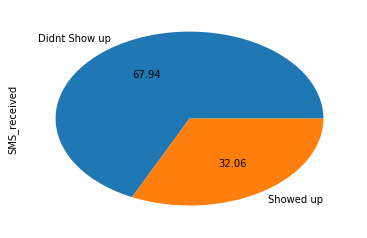

In [29]:
df['SMS_received'].value_counts().plot(kind='pie',labels=['Didnt Show up','Showed up'],autopct='%0.2f')

In [30]:
tot_records=df['PatientId'].count()

In [31]:
Cnt_RcdSMS=df.query('SMS_received==1')['PatientId'].count()
Cnt_RcdSMS

35002

In [32]:
df_SMS_rcd=df.query('SMS_received==1')
Cnt_Showup_RcdSMS= df_SMS_rcd.query('show ==1')['PatientId'].count()
Cnt_Showup_RcdSMS

25388

In [33]:

print(f"{(Cnt_RcdSMS*100)/tot_records:.2f}% of people received sms and {(Cnt_Showup_RcdSMS*100)/Cnt_RcdSMS:.2f}% of people who received SMS turned up to the doctor")



32.06% of people received sms and 72.53% of people who received SMS turned up to the doctor


<a id='conclusions'></a>
## Conclusions
Here are my observations from the data given above:

1. 80% of patients showed up to the doctor and only 20 % didnt show up
2. Among the people who shoed up to the doctor, most of them were Females.
3. DOW does seem to have effect Patients number showing up.Weekdays are more busier than 
   Weekends in General.
4. Ailements dont really effect the number of patients showing up. In General People with no 
   ailments turned up more than people with ailments. Amongst the people with ailments, 
   Patients with Hipertension were more.
5. Scholarships dont really effect the show up number. Infact People with no scholarship were
   more than the one with no scholarships.
6. Good percentage people who received SMS showed up to the doctor so Hospital Management
   should try sending Notifications to all the patients, which can improve chances of more 
   show ups.
## Limitation:

1. Majority of the data are Categeorical, which makes it difficult to draw correlations 


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0